In [ ]:
# instalação de bibliotecas
!pip install -U scikit-fuzzy

     |████████████████████████████████| 1.0MB 6.0MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=7520d2ed64cc4e391b1ef9c5bcce42153c66cfe6ea28f0c67b59c0718c6109a2
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  22
amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  23
amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  21
amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  24
amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  23
amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  23
amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  23
amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  24
amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  24
amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  24
media:  33.33333333333332 % de

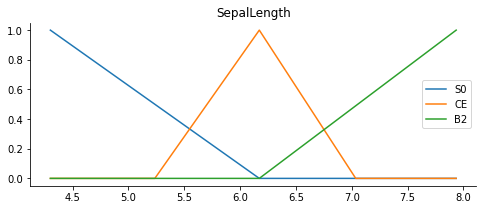

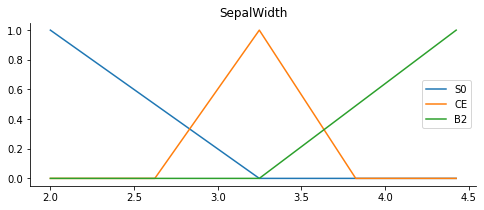

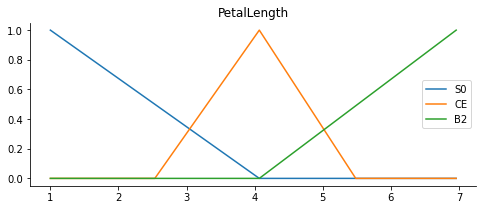

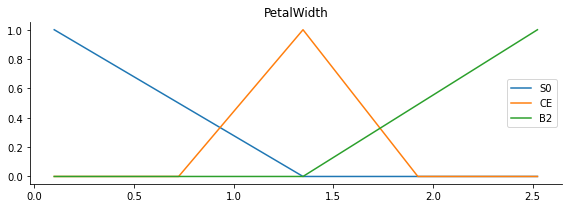

In [ ]:
# ==================================================================
# Universidade Estadual de Feira de Santana
# Mestrado em Ciência da Computação
# Disciplina: PGCC015 - Inteligência Computacional
# Professor: Matheus Giovanni Pires
# Aluno: Noberto Pires Maciel
# EPC06 - 20/11/2020
# Sistema de classificação Fuzzy Logic - Iris Plants
# ==================================================================

# Importacao das bibliotecas
import math
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from functools import reduce

def run(data_set_tra,data_set_tst,grafico=False):
    # Declaracao das variaveis globais
    N = 1
    cols = 4
    discretization = 100
    regioes = 2*N+1
    fuzz_sets = []
    step = []
    range_universe = []
    pertinencia = []
    indices_fuzzy = []
    attribute_range = []
    ax_range = []
    amostras = 0
    acuracia = 0
    # function tratamento dos dados dos atributos no arquivo .dat
    def manageAttrib(x,discretization=100):
      for el in x.values:
        stMin = str(el[0]).replace('[','').replace(',','')
        stMax = str(el[1]).replace(']','')
        min = float(stMin)
        max = float(stMax)
        step.append((max-min)/discretization)
        attribute_range.append((min,max))

    #Leitura dos atributos  do dataset no espaço (range)
    #@attribute SepalLength real [4.3, 7.9]
    #@attribute SepalWidth real [2.0, 4.4]
    #@attribute PetalLength real [1.0, 6.9]
    #@attribute PetalWidth real [0.1, 2.5]
    attribute_dat = pd.read_csv(data_set_tra, sep=' ', skiprows=1, nrows=4, header=None);
    manageAttrib(attribute_dat.iloc[:,3:5],discretization)

    # Leitura das amostras de treinamento
    data_set = pd.read_csv(data_set_tra, sep=',',skiprows=9, header=None, names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth','Output']);
    x_data_set = data_set.iloc[:,0:cols]
    y_data_set = data_set.iloc[:,cols:cols+1]
    y_data_set = y_data_set.to_numpy()

    # Leitura das amostras de teste
    tst_data_set = pd.read_csv(data_set_tst, sep=',',skiprows=9, header=None, names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth','Output']);
    tst_x_data_set = tst_data_set.iloc[:,0:cols]
    tst_y_data_set = tst_data_set.iloc[:,cols:cols+1]
    tst_y_data_set = tst_y_data_set.to_numpy()

    # separa os labels das classes (numericos e string)
    y_data_set_int = []
    y_data_set_str_tmp = []
    vlr = 0
    for z in range(len(y_data_set)):
      if y_data_set[z] not in y_data_set_str_tmp:
          y_data_set_str_tmp.append(y_data_set[z])
          vlr += 1
      y_data_set_int.append(vlr)


    # Distribuição dos atributos do dataset no espaço (range)
    for x in range(cols):
      range_universe.append(np.arange(attribute_range[x][0],attribute_range[x][1]+step[x]*2, step[x]))

    # Determinaçao dos índices dos valores inicial e final para composição do grafico da range_universe
    for x in range(cols):
        indices_fuzzy.append(len(range_universe[x])//(4*N))

    # Geraçao dos conjuntos fuzzy
    for x in range(cols):
      fuzz_region = []
      attrib = range_universe[x]
      index = indices_fuzzy[x]+1
      fuzz_region.append(fuzz.trimf(attrib, [attrib[0], attrib[0], attrib[index*2]]))
      for y in range(0,regioes,1):
        if index*(y+3) < len(range_universe[x]):
          fuzz_region.append(fuzz.trimf(attrib, [attrib[index], attrib[index*(y+2)], attrib[-index]]))
        else: 
          break
      fuzz_region.append(fuzz.trimf(attrib, [attrib[index*2], attrib[-1], attrib[-1]]))
      fuzz_sets.append(fuzz_region)

    # Valores mínimo, máximo e medio de cada classe e atributo
    space_min = data_set.groupby(['Output']).min()
    space_max = data_set.groupby(['Output']).max()
    space_mean = data_set.groupby(['Output']).mean()

    # Calcular o grau de pertinencia das amostras
    #onde pertinencia[x][y][z], ou seja pertinencia[atributos][regioes][amostras]
    label = attribute_dat.iloc[:,1:2]
    for x in range(cols):
      value = x_data_set[label.iloc[x]]
      pertList = []
      for y in range(regioes):
        z_pert = []
        for z in range(len(x_data_set)):
          z_pert.append(fuzz.interp_membership(range_universe[x], fuzz_sets[x][y], value.iloc[z]))
        pertList.append(z_pert)
      pertinencia.append(pertList)

    # Geraçao dos graficos de range_universe
    if grafico is True:
        for x in range(cols):
          fig, (ax) = plt.subplots(nrows=1, figsize=(8, 3))
          ce = int(regioes//2)
          for y in range(regioes):
            if y == ce:
              lb = 'CE'
            elif y < ce:
              lb = 'S'+str(y)
            else:
              lb = 'B'+str(y)
            ax.plot(range_universe[x], fuzz_sets[x][y], linewidth=1.5, label=lb)
          ax.set_title(data_set.groupby(['Output']).min().columns[x])
          ax.legend()
          ax_range.append(ax)

    # gerar as regras pelo algoritmo de wang-mendel
    # onde array_max = [amostra][atributo ou coluna][regiao fuzzy]
    array_max = []
    for z in range(len(x_data_set)):
      cols_tmp = []
      for x in range(cols):
        region_tmp = []
        for y in range(regioes):
          region_tmp.append(pertinencia[x][y][z])
        cols_tmp.append(region_tmp)
      array_max.append(cols_tmp)

    regions_index = [] # array de indices das regioes vencedoras para n amostras por coluna/atributo
    for x in range(cols):
      index_tmp = []
      for z in range(len(x_data_set)):
        index_tmp.append(array_max[z][x].index(max(array_max[z][x])))
      regions_index.append(index_tmp)

    rules_index = [] # array de indices das regras e saidas (indices das classes)
    for x in range(cols):
      rules_index.append(regions_index[x])
    rules_index.append(y_data_set_int)

    rules = [] # array de regras
    for z in range(len(x_data_set)):
      rules_tmp = []
      for x in range(cols+1):
        rules_tmp.append(rules_index[x][z])
      rules.append(rules_tmp)

    # atribui grau às regras
    rules_grad = []
    def multiplicar(rules_grad_tmp_y):
      tmp = []
      for y in range(len(rules_grad_tmp_y)):
        if(rules_grad_tmp_y[y] != 0):
          tmp.append(rules_grad_tmp_y[y])
      return (reduce(lambda a, b: a*b, tmp) if len(tmp) > 1 else tmp)
    for z in range(len(x_data_set)):
      rules_grad_tmp_x = []
      for x in range(cols):
        rules_grad_tmp_y = []
        for y in range(regioes):
            rules_grad_tmp_y.append(float(pertinencia[x][y][z]))
        rules_grad_tmp_x.append(multiplicar(rules_grad_tmp_y))
      rules_grad.append(rules_grad_tmp_x)

    rules_unique = [list(x) for x in set(tuple(x) for x in rules)] # eliminar regras com menor grad
    rules_unique.reverse()

    # function de testagem
    def test(tst_x_data_set):
        test_pertinence =[]
        rules_unique
        for x in range(cols):
            value = tst_x_data_set[label.iloc[x]]
            test_pertinence.append(x)
            pertList = []
            for y in range(regioes):
              z_pert = []
              for z in range(len(tst_x_data_set)):
                z_pert.append(fuzz.interp_membership(range_universe[x], fuzz_sets[x][y], value.iloc[z]))
              pertList.append(z_pert)
            test_pertinence[x] = pertList

        array_max_test = []
        for z in range(len(tst_x_data_set)):
          cols_tmp = []
          for x in range(cols):
            region_tmp = []
            for y in range(regioes):
              region_tmp.append(test_pertinence[x][y][z])
            cols_tmp.append(region_tmp)
          array_max_test.append(cols_tmp)
        regions_index_test = []
        for x in range(cols):
          index_tmp = []
          for z in range(len(tst_x_data_set)):
            index_tmp.append(array_max[z][x].index(max(array_max[z][x])))
          regions_index_test.append(index_tmp)
        
        compare_regions_index = []
        for z in range(len(tst_x_data_set)):
          tmp_test = []
          for x in range(cols):
            tmp_test.append(regions_index_test[x][z])
          compare_regions_index.append(tmp_test)
        
        # compara as pertinencias com as regras
        acertos = 0
        erros = 0
        amostras = len(tst_x_data_set)
        for z in range(amostras):
            for x in range(0,len(rules_unique),1):
              if compare_regions_index[z] == rules_unique[x][0:4]:
                if tst_y_data_set[z] in y_data_set_str_tmp[rules_unique[x][-1]-1]:
                    acertos += 1
                else:
                    erros += 1
        acuracia = (acertos/amostras)*100
        print('amostras: ',amostras, ' acertos: ',acertos, ' erros: ',erros, ' acurácia: ', acuracia,'%')
        print('Quantidade de Regras: ',len(rules_unique))
        return amostras, acuracia

    # disparo do teste
    amostras, acuracia = test(tst_x_data_set)
    
    # Plotagem dos graficos
    if grafico is True:
        for ax in ax_range:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.get_xaxis().tick_bottom()
            ax.get_yaxis().tick_left()
        plt.tight_layout()

    return amostras, acuracia

acuracia_total = 0
xi = []
for x in range(1,11,1):
    grafico = False
    # apontamento dos arquivos do data set
    data_set_tra = 'https://raw.githubusercontent.com/PGCC-Uefs/PGCC015/master/iris-10-fold/iris-10-'+str(x)+'tra.dat'
    data_set_tst = 'https://raw.githubusercontent.com/PGCC-Uefs/PGCC015/master/iris-10-fold/iris-10-'+str(x)+'tst.dat'

    # inicia
    if x == 10:
      grafico = True

    amostras, acuracia = run(data_set_tra,data_set_tst,grafico)
    xi.append(acuracia)
    acuracia_total += acuracia

    media = acuracia_total/len(xi)
    d = 0
    for i in range(len(xi)):
        d += xi[i]-media

desvio_padrao = math.sqrt(d/len(xi))
print('media: ',media,'%', 'desvio padrão: ',desvio_padrao)



amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  22
1
media:  33.33333333333333 % desvio padrão:  0.0
amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  23
2
media:  33.33333333333333 % desvio padrão:  0.0
amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  21
3
media:  33.33333333333333 % desvio padrão:  0.0
amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  24
4
media:  33.33333333333333 % desvio padrão:  0.0
amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  23
5
media:  33.33333333333333 % desvio padrão:  0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  23
6
media:  33.33333333333332 % desvio padrão:  8.429369702178807e-08


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  23
7
media:  33.33333333333332 % desvio padrão:  8.429369702178807e-08


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  24
8
media:  33.33333333333332 % desvio padrão:  8.429369702178807e-08


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  24
9
media:  33.33333333333332 % desvio padrão:  8.429369702178807e-08


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

amostras:  15  acertos:  5  erros:  10  acurácia:  33.33333333333333 %
Quantidade de Regras:  24
10
media:  33.33333333333332 % desvio padrão:  8.429369702178807e-08


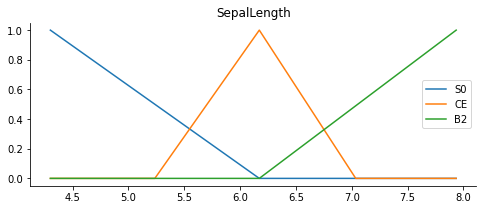

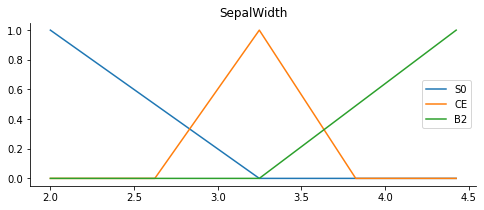

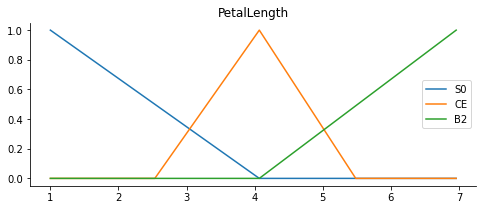

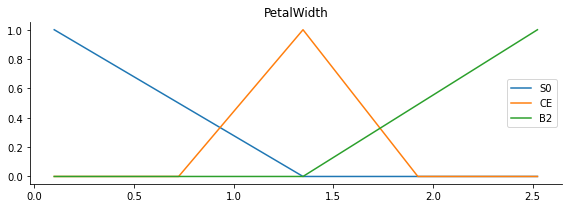

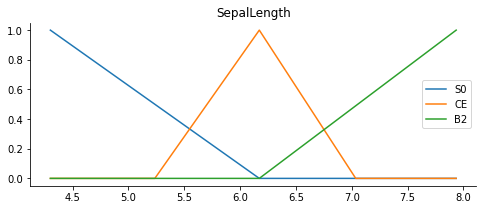

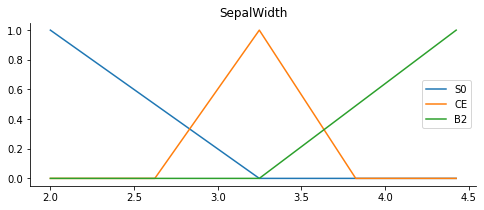

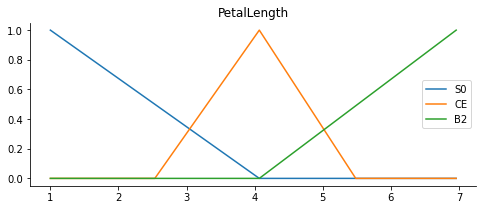

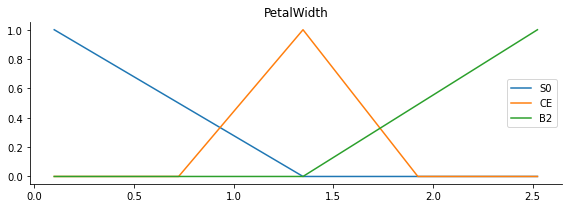

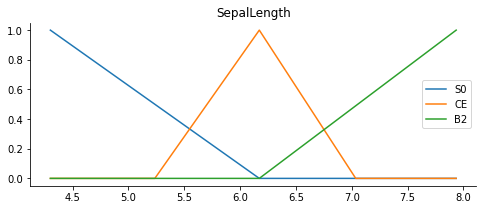

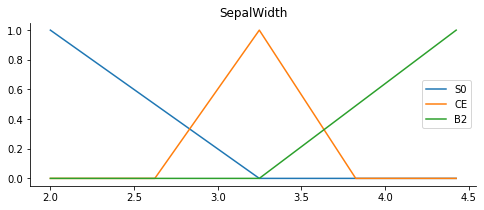

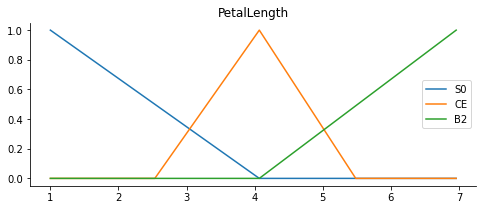

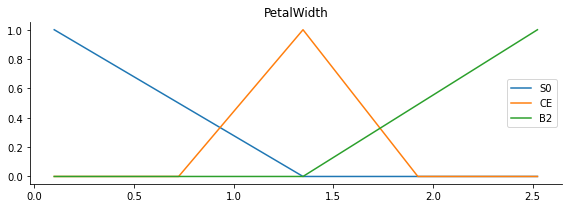

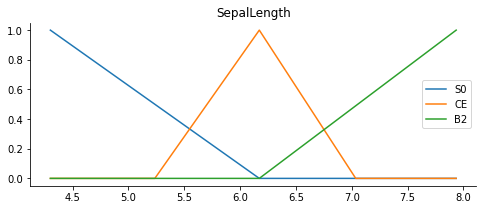

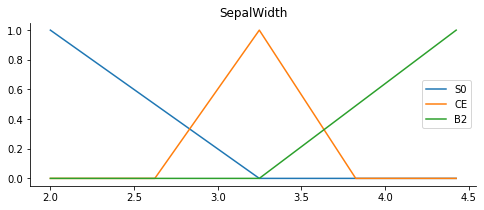

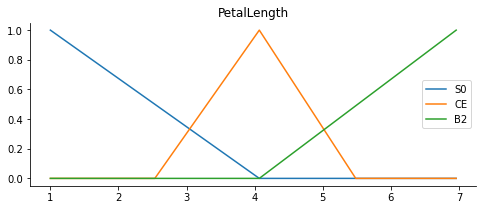

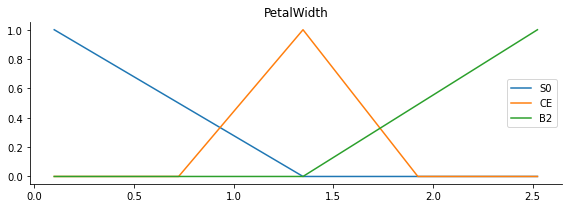

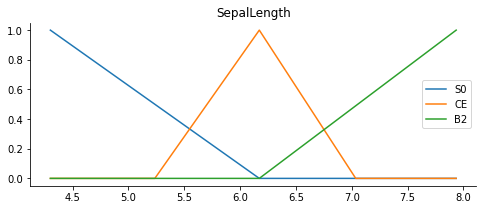

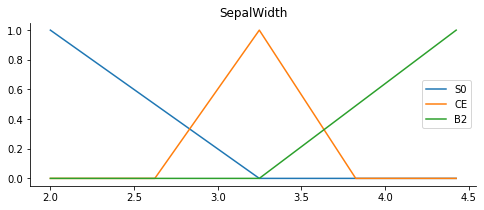

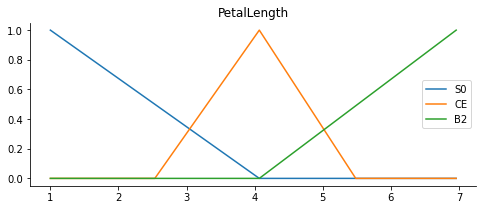

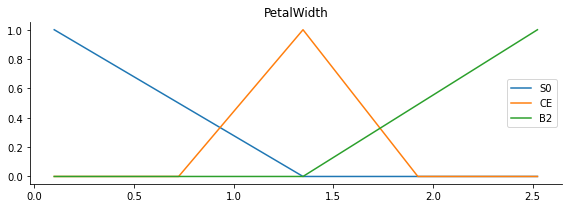

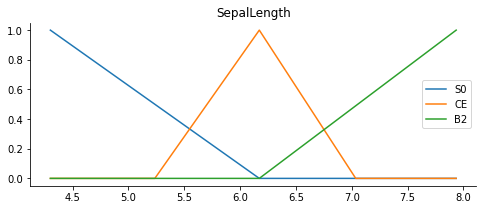

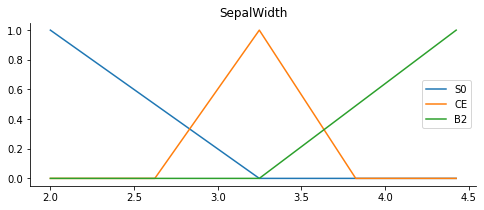

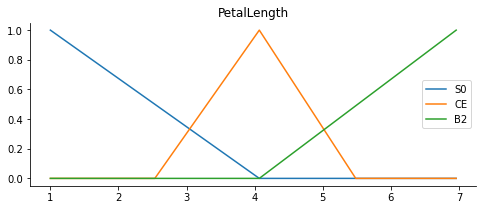

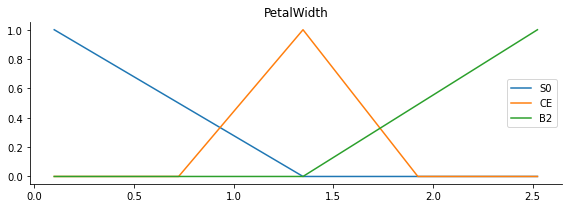

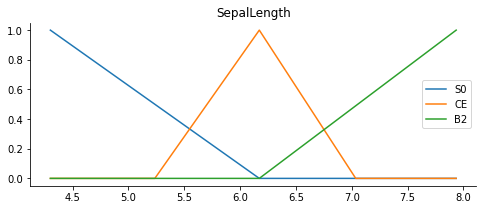

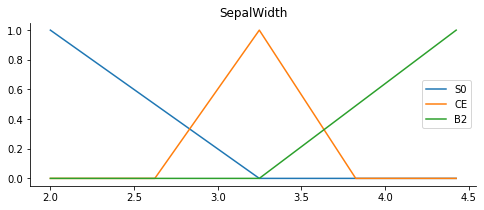

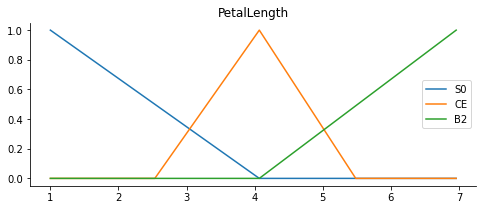

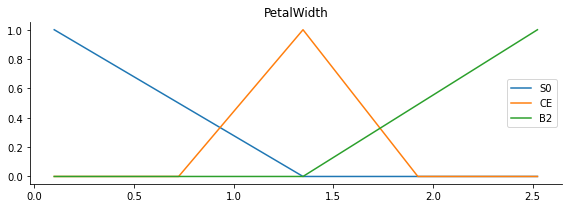

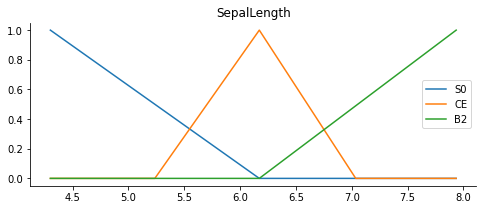

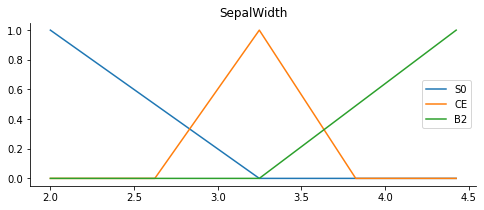

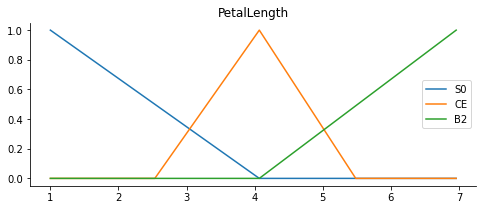

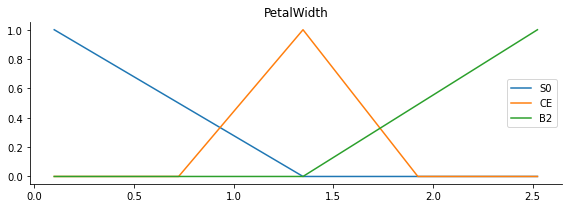

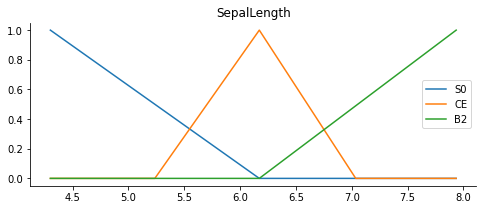

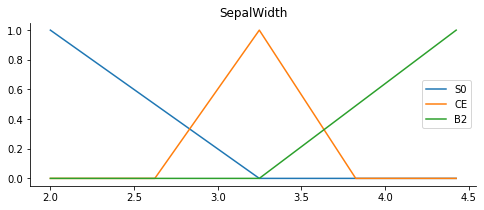

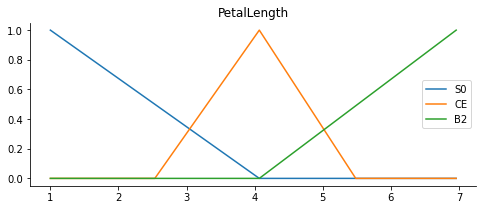

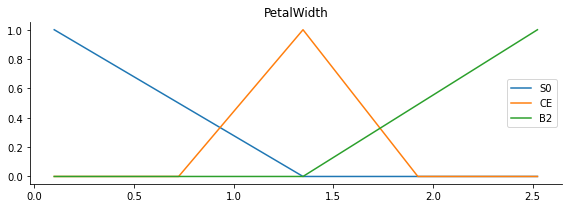

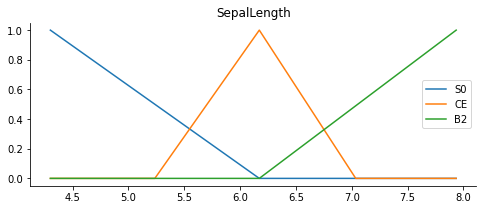

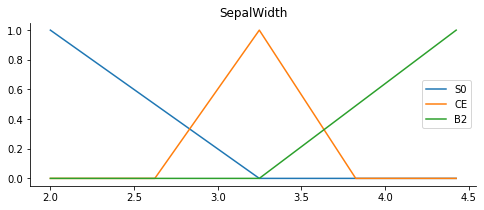

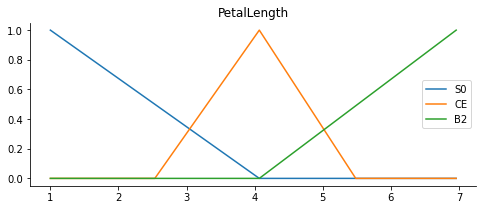

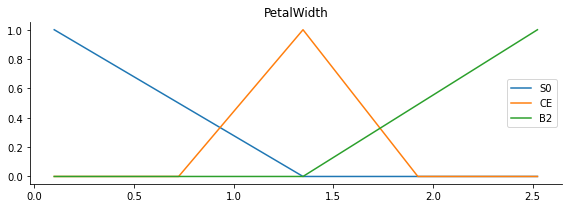

In [ ]:
# ==================================================================
# Universidade Estadual de Feira de Santana
# Mestrado em Ciência da Computação
# Disciplina: PGCC015 - Inteligência Computacional
# Professor: Matheus Giovanni Pires
# Aluno: Noberto Pires Maciel
# EPC06 - 17/11/2020
# Sistema de classificação Fuzzy Logic - Iris Plants
# ==================================================================

# Importacao das bibliotecas
import math
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from functools import reduce

def run(data_set_tra,data_set_tst):
    # Declaracao das variaveis globais
    N = 1
    cols = 4
    discretization = 100
    regioes = 2*N+1
    fuzz_sets = []
    step = []
    range_universe = []
    pertinencia = []
    indices_fuzzy = []
    attribute_range = []
    ax_range = []
    amostras = 0
    acuracia = 0
    # function tratamento dos dados dos atributos no arquivo .dat
    def manageAttrib(x,discretization=100):
      for el in x.values:
        stMin = str(el[0]).replace('[','').replace(',','')
        stMax = str(el[1]).replace(']','')
        min = float(stMin)
        max = float(stMax)
        step.append((max-min)/discretization)
        attribute_range.append((min,max))

    #73  6.3, 3.3, 6.0, 2.5, Iris-virginica
    #105 6.7, 3.3, 5.7, 2.5, Iris-virginica
    # Leitura dos atributos  do dataset no espaço (range)
    #@attribute SepalLength real [4.3, 7.9]
    #@attribute SepalWidth real [2.0, 4.4]
    #@attribute PetalLength real [1.0, 6.9]
    #@attribute PetalWidth real [0.1, 2.5]
    attribute_dat = pd.read_csv(data_set_tra, sep=' ', skiprows=1, nrows=4, header=None);
    manageAttrib(attribute_dat.iloc[:,3:5],discretization)

    # Leitura das amostras de treinamento
    data_set = pd.read_csv(data_set_tra, sep=',',skiprows=9, header=None, names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth','Output']);
    x_data_set = data_set.iloc[:,0:cols]
    y_data_set = data_set.iloc[:,cols:cols+1]
    y_data_set = y_data_set.to_numpy()

    # Leitura das amostras de teste
    tst_data_set = pd.read_csv(data_set_tst, sep=',',skiprows=9, header=None, names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth','Output']);
    tst_x_data_set = tst_data_set.iloc[:,0:cols]
    tst_y_data_set = tst_data_set.iloc[:,cols:cols+1]
    tst_y_data_set = tst_y_data_set.to_numpy()

    # separa os labels das classes (numericos e string)
    y_data_set_int = []
    y_data_set_str_tmp = []
    vlr = 0
    for z in range(len(y_data_set)):
      if y_data_set[z] not in y_data_set_str_tmp:
          y_data_set_str_tmp.append(y_data_set[z])
          vlr += 1
      y_data_set_int.append(vlr)


    # Distribuição dos atributos do dataset no espaço (range)
    for x in range(cols):
      range_universe.append(np.arange(attribute_range[x][0],attribute_range[x][1]+step[x]*2, step[x]))

    # Determinaçao dos índices dos valores inicial e final para composição do grafico da range_universe
    for x in range(cols):
        indices_fuzzy.append(len(range_universe[x])//(4*N))


    # Geraçao dos conjuntos fuzzy
    for x in range(cols):
      fuzz_region = []
      attrib = range_universe[x]
      index = indices_fuzzy[x]+1
      fuzz_region.append(fuzz.trimf(attrib, [attrib[0], attrib[0], attrib[index*2]]))
      for y in range(0,regioes,1):
        if index*(y+3) < len(range_universe[x]):
          fuzz_region.append(fuzz.trimf(attrib, [attrib[index], attrib[index*(y+2)], attrib[-index]])) # resolver largura desse trimf
        else: 
          break
      fuzz_region.append(fuzz.trimf(attrib, [attrib[index*2], attrib[-1], attrib[-1]]))
      fuzz_sets.append(fuzz_region)


    # Valores mínimo, máximo e medio de cada classe e atributo
    space_min = data_set.groupby(['Output']).min()
    space_max = data_set.groupby(['Output']).max()
    space_mean = data_set.groupby(['Output']).mean()
    #print('max: ',space_max)
    #print('mean: ',space_mean)
    #print('min: ',space_min)

    # Calcular o grau de pertinencia das amostras
    #onde pertinencia[x][y][z], ou seja pertinencia[atributos][regioes][amostras]
    label = attribute_dat.iloc[:,1:2]
    for x in range(cols):
      value = x_data_set[label.iloc[x]]
      pertList = []
      for y in range(regioes):
        z_pert = []
        for z in range(len(x_data_set)):
          z_pert.append(fuzz.interp_membership(range_universe[x], fuzz_sets[x][y], value.iloc[z]))
        pertList.append(z_pert)
      pertinencia.append(pertList)

    # Geraçao dos graficos de range_universe
    for x in range(cols):
      fig, (ax) = plt.subplots(nrows=1, figsize=(8, 3))
      ce = int(regioes//2)
      for y in range(regioes):
        if y == ce:
          lb = 'CE'
        elif y < ce:
          lb = 'S'+str(y)
        else:
          lb = 'B'+str(y)
        ax.plot(range_universe[x], fuzz_sets[x][y], linewidth=1.5, label=lb)
      ax.set_title(data_set.groupby(['Output']).min().columns[x])
      ax.legend()
      ax_range.append(ax)

    # gerar as regras pelo algoritmo de wang-mendel
    # onde array_max = [amostra][atributo ou coluna][regiao fuzzy]
    array_max = []
    for z in range(len(x_data_set)):
      cols_tmp = []
      for x in range(cols):
        region_tmp = []
        for y in range(regioes):
          region_tmp.append(pertinencia[x][y][z])
        cols_tmp.append(region_tmp)
      array_max.append(cols_tmp)

    regions_index = [] # array de indices das regioes vencedoras para n amostras por coluna/atributo
    for x in range(cols):
      index_tmp = []
      for z in range(len(x_data_set)):
        index_tmp.append(array_max[z][x].index(max(array_max[z][x])))
      regions_index.append(index_tmp)

    rules_index = [] # array de indices das regras e saidas (indices das classes)
    for x in range(cols):
      rules_index.append(regions_index[x])
    rules_index.append(y_data_set_int)

    rules = [] # array de regras
    for z in range(len(x_data_set)):
      rules_tmp = []
      for x in range(cols+1):
        rules_tmp.append(rules_index[x][z])
      rules.append(rules_tmp)

    # atribui grau às regras
    rules_grad = []
    def multiplicar(rules_grad_tmp_y):
      tmp = []
      for y in range(len(rules_grad_tmp_y)):
        #print(y,' rules_grad_tmp_y[y]: ',rules_grad_tmp_y[y])
        if(rules_grad_tmp_y[y] != 0):
          tmp.append(rules_grad_tmp_y[y])
      #print('reduce',(reduce(lambda a, b: a*b, tmp) if len(tmp) > 1 else tmp))
      return (reduce(lambda a, b: a*b, tmp) if len(tmp) > 1 else tmp)
    for z in range(len(x_data_set)):
      rules_grad_tmp_x = []
      for x in range(cols):
        rules_grad_tmp_y = []
        for y in range(regioes):
            rules_grad_tmp_y.append(float(pertinencia[x][y][z]))
            #print('z: ', z, ' y: ', y,' pertinencia: ',pertinencia[x][y][z])
        rules_grad_tmp_x.append(multiplicar(rules_grad_tmp_y))
      rules_grad.append(rules_grad_tmp_x)
      
    #print('rules_grad: ',rules_grad) # grads das regras para os atributos de todas as amostras
    #print('rules: ',rules)

    rules_unique = [list(x) for x in set(tuple(x) for x in rules)] # eliminar regras com menor grad
    rules_unique.reverse()

    #print('rules_unique: ',rules_unique)

    # function de testagem
    def test(tst_x_data_set):
        test_pertinence =[]
        rules_unique
        for x in range(cols):
            value = tst_x_data_set[label.iloc[x]]
            test_pertinence.append(x)
            pertList = []
            for y in range(regioes):
              z_pert = []
              for z in range(len(tst_x_data_set)):
                z_pert.append(fuzz.interp_membership(range_universe[x], fuzz_sets[x][y], value.iloc[z]))
              pertList.append(z_pert)
            test_pertinence[x] = pertList

        array_max_test = []
        for z in range(len(tst_x_data_set)):
          cols_tmp = []
          for x in range(cols):
            region_tmp = []
            for y in range(regioes):
              region_tmp.append(test_pertinence[x][y][z])
            cols_tmp.append(region_tmp)
          array_max_test.append(cols_tmp)
        regions_index_test = []
        for x in range(cols):
          index_tmp = []
          for z in range(len(tst_x_data_set)):
            index_tmp.append(array_max[z][x].index(max(array_max[z][x])))
          regions_index_test.append(index_tmp)
        
        compare_regions_index = []
        for z in range(len(tst_x_data_set)):
          tmp_test = []
          for x in range(cols):
            tmp_test.append(regions_index_test[x][z])
          compare_regions_index.append(tmp_test)
        
        # compara as pertinencias com as regras
        acertos = 0
        erros = 0
        amostras = len(tst_x_data_set)
        for z in range(amostras):
            for x in range(0,len(rules_unique),1):
              if compare_regions_index[z] == rules_unique[x][0:4]:
                #print(z,y_data_set_str_tmp[rules_unique[x][-1]-1],compare_regions_index[z],rules_unique[x][0:4])
                if tst_y_data_set[z] in y_data_set_str_tmp[rules_unique[x][-1]-1]:
                    acertos += 1
                else:
                    erros += 1
        acuracia = (acertos/amostras)*100
        print('amostras: ',amostras, ' acertos: ',acertos, ' erros: ',erros, ' acurácia: ', acuracia,'%')
        print('Quantidade de Regras: ',len(rules_unique))
        return amostras, acuracia

    # disparo do teste
    amostras, acuracia = test(tst_x_data_set)
    t = pertinencia[0],pertinencia[1],pertinencia[2],pertinencia[3]
    #print(len(t[0][0]))

    # Plotagem dos graficos
    for ax in ax_range:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    plt.tight_layout()
    return amostras, acuracia

acuracia_total = 0
xi = []
for x in range(1,11,1):
    # apontamento dos arquivos do data set
    data_set_tra = 'https://raw.githubusercontent.com/PGCC-Uefs/PGCC015/master/iris-10-fold/iris-10-'+str(x)+'tra.dat'
    data_set_tst = 'https://raw.githubusercontent.com/PGCC-Uefs/PGCC015/master/iris-10-fold/iris-10-'+str(x)+'tst.dat'

    # inicia
    amostras, acuracia = run(data_set_tra,data_set_tst)
    xi.append(acuracia)
    acuracia_total += acuracia

    media = acuracia_total/len(xi)
    d = 0
    print(len(xi))
    for i in range(len(xi)):
        d += xi[i]-media

    desvio_padrao = math.sqrt(d/len(xi))
    print('media: ',media,'%', 'desvio padrão: ',desvio_padrao)



In [ ]:
a = np.array([[1, 1],[1, 0],[2, 3]])
b = np.unique(a, axis=0)
print(b)

[[1 0]
 [1 1]
 [2 3]]


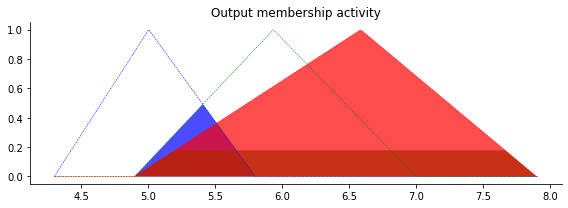

In [ ]:

#sepala_length = range_universe[0]
#sepala_width = range_universe[1]
#petala_length = range_universe[2]
#petala_width = range_universe[3]

#sepala_length_index = indices_fuzzy[0]
#sepala_width_index = indices_fuzzy[1]
#petala_length_index = indices_fuzzy[2]
#petala_width_index = indices_fuzzy[3]

#sepala_curta = fuzz.trimf(sepala_length, [sepala_length[0], sepala_length[0], np.median(sepala_length)])
#sepala_media = fuzz.trimf(sepala_length, [sepala_length[sepala_length_index], np.median(sepala_length), sepala_length[-sepala_length_index]])
#sepala_comprida = fuzz.trimf(sepala_length, [np.median(sepala_length), sepala_length[-1], sepala_length[-1]])
#sepala_estreita = fuzz.trimf(sepala_width, [sepala_width[0], sepala_width[0], np.median(sepala_width)])
#sepala_mediana = fuzz.trimf(sepala_width, [sepala_width[sepala_width_index], np.median(sepala_width), sepala_width[-sepala_width_index]])
#sepala_larga = fuzz.trimf(sepala_width, [np.median(sepala_width), sepala_width[-1], sepala_width[-1]])
#petala_curta = fuzz.trimf(petala_length, [petala_length[0], petala_length[0], np.median(petala_length)])
#petala_media = fuzz.trimf(petala_length, [petala_length[petala_length_index], np.median(petala_length), petala_length[-petala_length_index]])
#petala_comprida = fuzz.trimf(petala_length, [np.median(petala_length), petala_length[-1], petala_length[-1]])
#petala_estreita = fuzz.trimf(petala_width, [petala_width[0], petala_width[0], np.median(petala_width)])
#petala_mediana = fuzz.trimf(petala_width, [petala_width[petala_width_index], np.median(petala_width), petala_width[-petala_width_index]])
#petala_larga = fuzz.trimf(petala_width, [np.median(petala_width), petala_width[-1], petala_width[-1]])


# geraçao dos conjuntos fuzzy de cada classe
#iris_setosa_sl = fuzz.trimf(sepala_length, [space_min['SepalLength'][0],space_mean['SepalLength'][0],space_max['SepalLength'][0]])
#iris_versicolor_sl = fuzz.trimf(sepala_length, [space_min['SepalLength'][1],space_mean['SepalLength'][1],space_max['SepalLength'][1]])
#iris_virginica_sl = fuzz.trimf(sepala_length, [space_min['SepalLength'][2],space_mean['SepalLength'][2],space_max['SepalLength'][2]])

#iris_setosa_sw = fuzz.trimf(sepala_width, [space_min['SepalWidth'][0],space_mean['SepalWidth'][0],space_max['SepalWidth'][0]])
#iris_versicolor_sw = fuzz.trimf(sepala_width, [space_min['SepalWidth'][1],space_mean['SepalWidth'][1],space_max['SepalWidth'][1]])
#iris_virginica_sw = fuzz.trimf(sepala_width, [space_min['SepalWidth'][2],space_mean['SepalWidth'][2],space_max['SepalWidth'][2]])

#iris_setosa_pl = fuzz.trimf(petala_length, [space_min['PetalLength'][0],space_mean['PetalLength'][0],space_max['PetalLength'][0]])
#iris_versicolor_pl = fuzz.trimf(petala_length, [space_min['PetalLength'][1],space_mean['PetalLength'][1],space_max['PetalLength'][1]])
#iris_virginica_pl = fuzz.trimf(petala_length, [space_min['PetalLength'][2],space_mean['PetalLength'][2],space_max['PetalLength'][2]])

#iris_setosa_pw = fuzz.trimf(petala_width, [space_min['PetalWidth'][0],space_mean['PetalWidth'][0],space_max['PetalWidth'][0]])
#iris_versicolor_pw = fuzz.trimf(petala_width, [space_min['PetalWidth'][1],space_mean['PetalWidth'][1],space_max['PetalWidth'][1]])
#iris_virginica_pw = fuzz.trimf(petala_width, [space_min['PetalWidth'][2],space_mean['PetalWidth'][2],space_max['PetalWidth'][2]])

#fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=cols+1, figsize=(8, 12))

#ax0.plot(sepala_length, sepala_curta, 'b', linewidth=1.5, label='Curta')
#ax0.plot(sepala_length, sepala_media, 'g', linewidth=1.5, label='Média')
#ax0.plot(sepala_length, sepala_comprida, 'r', linewidth=1.5, label='Comprida')
#ax0.set_title('Comprimento da Sepala')
#ax0.legend()

#ax1.plot(sepala_width, sepala_estreita, 'b', linewidth=1.5, label='Estreita')
#ax1.plot(sepala_width, sepala_mediana, 'g', linewidth=1.5, label='Mediana')
#ax1.plot(sepala_width, sepala_larga, 'r', linewidth=1.5, label='Larga')
#ax1.set_title('Largura da Sepala')
#ax1.legend()

#ax2.plot(petala_length, petala_curta, 'b', linewidth=1.5, label='Estreita')
#ax2.plot(petala_length, petala_media, 'g', linewidth=1.5, label='Média')
#ax2.plot(petala_length, petala_comprida, 'r', linewidth=1.5, label='Comprida')
#ax2.set_title('Petala Length')
#ax2.legend()

#ax3.plot(petala_width, petala_estreita, 'b', linewidth=1.5, label='Estreita')
#ax3.plot(petala_width, petala_mediana, 'g', linewidth=1.5, label='Mediana')
#ax3.plot(petala_width, petala_larga, 'r', linewidth=1.5, label='Larga')
#ax3.set_title('Petala Width')
#ax3.legend()

#ax4.plot(sepala_length, iris_setosa_sl, 'r', linewidth=1.5, label='sepala_length', linestyle='--')
#ax4.plot(sepala_width, iris_setosa_sw, 'g', linewidth=1.5, label='sepala_width', linestyle='--')
#ax4.plot(petala_length, iris_setosa_pl, 'b', linewidth=1.5, label='petala_length', linestyle='--')
#ax4.plot(petala_width, iris_setosa_pw, 'k', linewidth=1.5, label='petala_width', linestyle='--')
#ax4.fill_between(sepala_length, iris_setosa_sl, facecolor='r', alpha=0.3, interpolate=True, label='Iris-setosa')
#ax4.fill_between(sepala_width, iris_setosa_sw, facecolor='r', alpha=0.3, interpolate=True)
#ax4.fill_between(petala_length, iris_setosa_pl, facecolor='r', alpha=0.3, interpolate=True)
#ax4.fill_between(petala_width, iris_setosa_pw, facecolor='r', alpha=0.3, interpolate=True)

#ax4.plot(sepala_length, iris_versicolor_sl, 'r', linewidth=1.5, linestyle='--')
#ax4.plot(sepala_width, iris_versicolor_sw, 'g', linewidth=1.5, linestyle='--')
#ax4.plot(petala_length, iris_versicolor_pl, 'b', linewidth=1.5, linestyle='--')
#ax4.plot(petala_width, iris_versicolor_pw, 'k', linewidth=1.5, linestyle='--')
#ax4.fill_between(sepala_length, iris_versicolor_sl, facecolor='g', alpha=0.3, interpolate=True, label='Iris-versicolor')
#ax4.fill_between(sepala_width, iris_versicolor_sw, facecolor='g', alpha=0.3, interpolate=True)
#ax4.fill_between(petala_length, iris_versicolor_pl, facecolor='g', alpha=0.3, interpolate=True)
#ax4.fill_between(petala_width, iris_versicolor_pw, facecolor='g', alpha=0.3, interpolate=True)

#ax4.plot(sepala_length, iris_virginica_sl, 'r', linewidth=1.5, linestyle='--')
#ax4.plot(sepala_width, iris_virginica_sw, 'g', linewidth=1.5, linestyle='--')
#ax4.plot(petala_length, iris_virginica_pl, 'b', linewidth=1.5, linestyle='--')
#ax4.plot(petala_width, iris_virginica_pw, 'k', linewidth=1.5, linestyle='--')
#ax4.fill_between(sepala_length, iris_virginica_sl, facecolor='b', alpha=0.3, interpolate=True, label='Iris-virginica')
#ax4.fill_between(sepala_width, iris_virginica_sw, facecolor='b', alpha=0.3, interpolate=True)
#ax4.fill_between(petala_length, iris_virginica_pl, facecolor='b', alpha=0.3, interpolate=True)
#ax4.fill_between(petala_width, iris_virginica_pw, facecolor='b', alpha=0.3, interpolate=True)
#ax4.plot([0, 3.5], [0, 3.5], 'k', linewidth=1.5, alpha=0.9)
#ax4.set_title('Iris plant Classes x attribute')
#ax4.legend(bbox_to_anchor=(1.05, 1),loc='upper left')

#for ax in (ax0, ax1, ax2, ax3, ax4):
#    ax.spines['top'].set_visible(False)
#    ax.spines['right'].set_visible(False)
#    ax.get_xaxis().tick_bottom()
#    ax.get_yaxis().tick_left()

# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
qual_level_lo = fuzz.interp_membership(sepala_length, sepala_curta, 7.9)
qual_level_md = fuzz.interp_membership(sepala_length, sepala_media, 7.9)
qual_level_hi = fuzz.interp_membership(sepala_length, sepala_comprida, 7.9)

serv_level_lo = fuzz.interp_membership(sepala_width, sepala_estreita, 3.8)
serv_level_md = fuzz.interp_membership(sepala_width, sepala_mediana, 3.8)
serv_level_hi = fuzz.interp_membership(sepala_width, sepala_larga, 3.8)

# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(qual_level_lo, iris_setosa_sl)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
tip_activation_lo = np.fmin(active_rule1, iris_versicolor_sl)  # removed entirely to 0

# For rule 2 we connect acceptable service to medium tipping
tip_activation_md = np.fmin(serv_level_md, iris_virginica_sl)

# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, iris_virginica_sl)
tip0 = np.zeros_like(sepala_length)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(sepala_length, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(sepala_length, iris_setosa_sl, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(sepala_length, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(sepala_length, iris_versicolor_sl, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(sepala_length, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(sepala_length, iris_virginica_sl, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [ ]:
# Aggregate all three output membership functions together
aggregated = np.fmax(tip_activation_lo, np.fmax(tip_activation_md, tip_activation_hi))

# Calculate defuzzified result
tip = fuzz.defuzz(sepala_length, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(sepala_length, aggregated, tip)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(sepala_length, iris_setosa_sl, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(sepala_length, iris_versicolor_sl, 'g', linewidth=0.5, linestyle='--')
ax0.plot(sepala_length, iris_virginica_sl, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(sepala_length, tip0, aggregated, facecolor='White', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

NameError: ignored

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


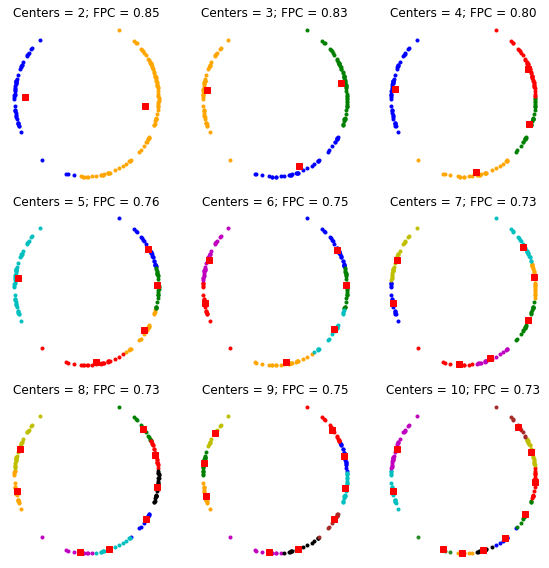

In [ ]:
# ==================================================================
# codigo pronto - adaptado
import numpy as np, pandas as pd, os
import matplotlib
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import Normalizer
import skfuzzy as fuzz
from sklearn import datasets

def load_iris():
    data_file = "https://raw.githubusercontent.com/PGCC-Uefs/PGCC015/master/EPC04/datasets/iris.txt"
    return np.loadtxt(data_file, delimiter=",", usecols=range(0,5), dtype=np.float64)

iris = datasets.load_iris()

x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
lsa = TruncatedSVD(2, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(X_std)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
a= pd.DataFrame(dtm_lsa, columns = ["component_1","component_2"])
a['targets']=y
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((a['component_1'], a['component_2']))
fpcs = []

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen'] 

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later plots
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(a['component_1'][cluster_membership == j],
                a['component_2'][cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()
fig1.savefig('iris_dataset.png')